# Fashion Mnist数据集多分类任务

## Fashion MNIST数据集简介

Fashion MNIST是一个替代MNIST手写数字集的图像数据集。它是由 Zalando（一家德国的时尚科技公司）旗下的研究部门提供，其涵盖了来自10种类别的共7万个不同商品的正面图片。

FashionMNIST的大小（28x28）、格式（灰度图片）和训练集/测试集划分（60000/10000）与原始的MNIST完全一致。

这个数据集的样子大致如下（每个类别占三行）：

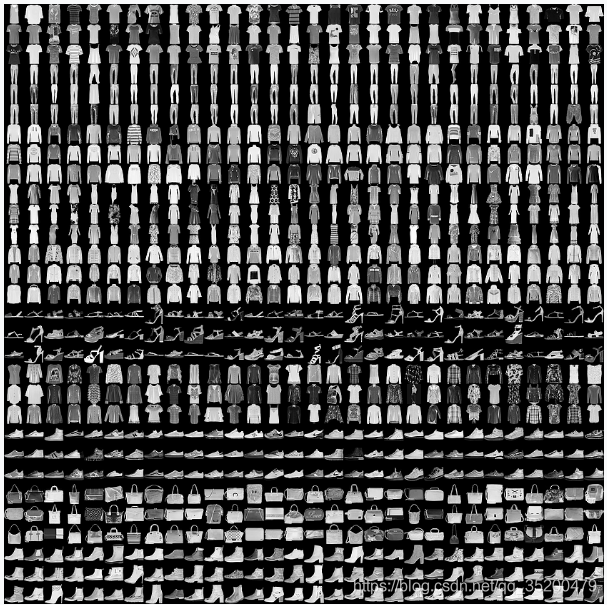

数据集共有10个类别：

  0: T-shirt/top（T恤）
  
  1: Trouser（裤子）
  
  2: Pullover（套衫）
  
  3: Dress（裙子）
  
  4: Coat（外套）
  
  5: Sandal（凉鞋）
  
  6: Shirt（汗衫）
  
  7: Sneaker（运动鞋）
  
  8: Bag（包）
  
  9: Ankle boot（踝靴）

## 导入必要的模块

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import os

## 载入Fashion MNIST数据集

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


维度(60000, 28, 28) —> (60000, 784)

In [3]:
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

归一化处理

In [4]:
x_train = x_train/255.0
x_test = x_test/255.0

## 模型搭建

使用到的api：

**全连接操作`tf.keras.layers.Dense`**

用到的参数：

- **units**：输入整数，全连接层神经元个数。


- **activation**：激活函数。

  可选项：
  
  - 'sigmoid'：sigmoid激活函数
  
  - 'tanh'：tanh激活函数
  
  - 'relu'：relu激活函数
  
  - 'elu'或tf.keras.activations.elu(alpha=1.0)：elu激活函数
  
  - 'selu'：selu激活函数
  
  - 'swish': swish激活函数(tf2.2版本以上才有)
  
  - 'softmax': softmax函数


- **kernel_initializer**：权重初始化，默认是'glorot_uniform'（即Xavier均匀初始化）。

  可选项：
  
  - 'RandomNormal'或tf.keras.initializers.TruncatedNormal(mean=0.0, stddev=0.05)：正态分布采样，均值为0，标准差0.05
  
  - 'glorot_normal'：正态分布采样，均值为0，方差为2 / (fan_in + fan_out)
  
  - 'glorot_uniform'：均匀分布采样，范围[-limit, limit]，limit = sqrt(6 / (fan_in + fan_out))

  - 'lecun_normal'：正态分布采样，均值为0，方差为1 / fan_in
  
  - 'lecun_uniform'：均匀分布采样，范围[-limit, limit]，limit = sqrt(3 / fan_in)
  
  - 'he_normal'：正态分布采样，均值为0，方差为2 / fan_in
  
  - 'he_uniform'：均匀分布采样，范围[-limit, limit]，limit = sqrt(6 / fan_in)
  
  fan_in是输入的神经元个数，fan_out是输出的神经元个数。


- **name**：输入字符串，给该层设置一个名称。

**模型设置`tf.keras.Sequential.compile`**

用到的参数：

- **loss**：损失函数，对于分类任务，如果标签没做one hot编码，一般使用"sparse_categorical_crossentropy"，否则使用"categorical_crossentropy"。


- **optimizer**：优化器，这里选用"sgd"，更多优化器请查看https://tensorflow.google.cn/api_docs/python/tf/keras/optimizers


- **metrics**：评价指标，这里选用"accuracy"，更多优化器请查看https://tensorflow.google.cn/api_docs/python/tf/keras/metrics


按照任务一的要求补全隐层的代码

In [5]:
# 输入层inputx
inputs = Input(shape=(28*28), name='input')

# 隐层dense
x = Dense(, name='dense_0')(inputs)
x = Dense(, name='dense_1')(x)

# 输出层
outputs = Dense(units=10, activation='softmax', name='logit')(x)

# 设置模型的inputs和outputsin
model = Model(inputs=inputs, outputs=outputs)

# 设置损失函数loss、优化器optimizer、评价标准metrics
model.compile(loss='sparse_categorical_crossentropy',
              optimizer="sgd", metrics=['accuracy'])

查看模型每层的参数量和输出的大小

In [6]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 784)]             0         
_________________________________________________________________
dense_0 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
logit (Dense)                (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


## 模型训练

**`tf.keras.Sequential.fit`**

用到的参数：

- **x**：输入数据。


- **y**：输入标签。


- **batch_size**：一次梯度更新使用的数据量。


- **epochs**：数据集跑多少轮模型训练，一轮表示整个数据集训练一次。


- **validation_split**：验证集占总数据量的比例，取值0~1。


- **shuffle**：每轮训练是否打乱数据顺序，默认True。

返回：History对象，History.history属性会记录每一轮训练集和验证集的损失函数值和评价指标。。

In [8]:
history = model.fit(x=x_train, y=y_train, batch_size=32,
                    epochs=150, validation_split=0.2,
                    shuffle=True)

Train on 48000 samples, validate on 12000 samples
Epoch 1/150
48000/48000 [==============================] - 3s 69us/sample - loss: 0.6927 - accuracy: 0.7719 - val_loss: 0.5130 - val_accuracy: 0.8171
Epoch 2/150
48000/48000 [==============================] - 3s 60us/sample - loss: 0.4796 - accuracy: 0.8326 - val_loss: 0.4646 - val_accuracy: 0.8288
Epoch 3/150
48000/48000 [==============================] - 3s 60us/sample - loss: 0.4399 - accuracy: 0.8437 - val_loss: 0.4293 - val_accuracy: 0.8463
Epoch 4/150
48000/48000 [==============================] - 3s 59us/sample - loss: 0.4170 - accuracy: 0.8521 - val_loss: 0.4133 - val_accuracy: 0.8553
Epoch 5/150
48000/48000 [==============================] - 3s 60us/sample - loss: 0.3998 - accuracy: 0.8578 - val_loss: 0.4080 - val_accuracy: 0.8515
Epoch 6/150
48000/48000 [==============================] - 3s 59us/sample - loss: 0.3875 - accuracy: 0.8623 - val_loss: 0.3947 - val_accuracy: 0.8574
Epoch 7/150
48000/48000 [=========================

Epoch 55/150
48000/48000 [==============================] - 3s 59us/sample - loss: 0.2062 - accuracy: 0.9260 - val_loss: 0.3120 - val_accuracy: 0.8895
Epoch 56/150
48000/48000 [==============================] - 3s 60us/sample - loss: 0.2043 - accuracy: 0.9252 - val_loss: 0.3040 - val_accuracy: 0.8914
Epoch 57/150
48000/48000 [==============================] - 3s 58us/sample - loss: 0.2012 - accuracy: 0.9274 - val_loss: 0.3080 - val_accuracy: 0.8905
Epoch 58/150
48000/48000 [==============================] - 3s 59us/sample - loss: 0.1993 - accuracy: 0.9279 - val_loss: 0.3140 - val_accuracy: 0.8890
Epoch 59/150
48000/48000 [==============================] - 3s 59us/sample - loss: 0.1983 - accuracy: 0.9277 - val_loss: 0.3098 - val_accuracy: 0.8911
Epoch 60/150
48000/48000 [==============================] - 3s 59us/sample - loss: 0.1962 - accuracy: 0.9296 - val_loss: 0.3143 - val_accuracy: 0.8876
Epoch 61/150
48000/48000 [==============================] - 3s 60us/sample - loss: 0.1942 - ac

画图查看history数据的变化趋势

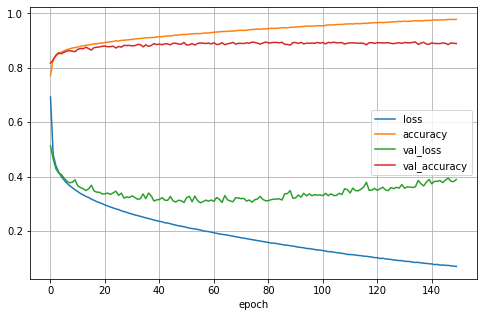

In [9]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.xlabel('epoch')
plt.show()

随着epoch的增加，loss（蓝线）不断下降，val_loss（绿线）先下降后抬升，这种变化趋势说明模型过拟合了。

## 测试集评估结果

In [10]:
loss, accuracy = model.evaluate(x_test, y_test)
print('loss: ', loss)
print('accuracy: ', accuracy)

10000/10000 [==============================] - 1s 51us/sample - loss: 0.4114 - accuracy: 0.8894
loss:  0.4113990136742592
accuracy:  0.8894


## 任务一

搭建模型，要求设置两层隐层：

- 第一层隐层设置：神经元个数256，初始化方法为glorot_normal，激活函数为tanh


- 第二层隐层设置：神经元个数128，初始化方法为glorot_normal，激活函数为tanh

然后，运行模型训练和测试集评估代码。

## 任务二

请尝试使用课上讲的提前终止的方法解决过拟合，使用到的api如下：

**`tf.keras.callbacks.EarlyStopping`**

用到的参数：

- **monitor**：监控的数据，一般为'val_loss'。


- **min_delta**：定义模型改善的最小量，只有大于min_delta才会认为模型有改善，默认为0。


- **patience**：有多少个epoch，模型没有改善，训练就会停止，默认为0。


- **restore_best_weights**：是否使用监控数据最好的模型参数，如果是False，使用的是训练最后一步的模型参数，默认False。

## 任务三

根据以下表格，设置网络的初始化方法和激活函数，将Test Accuracy的最终结果填入下表。

| 权重初始化 | 激活函数 | Test Accuracy |
| :--------: | :------: | :-----------: |
|   glorot_normal   |   tanh   |  |
|     he_normal     |   relu   |  |
| glorot_normal | elu |  |
| glorot_normal | selu |  |